# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV


In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Revisaremos tipos de datos, filas y columnas. Fase exploratoria.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
#Revisión si hay valores únicos. Revisar si existen variables con un único valor a lo largo de la data.
v_uniques = df.nunique()
v_uniques

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
#Valores faltantes en el dataSet
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Revisión de filas duplicadas:
df.duplicated().sum()

np.int64(0)

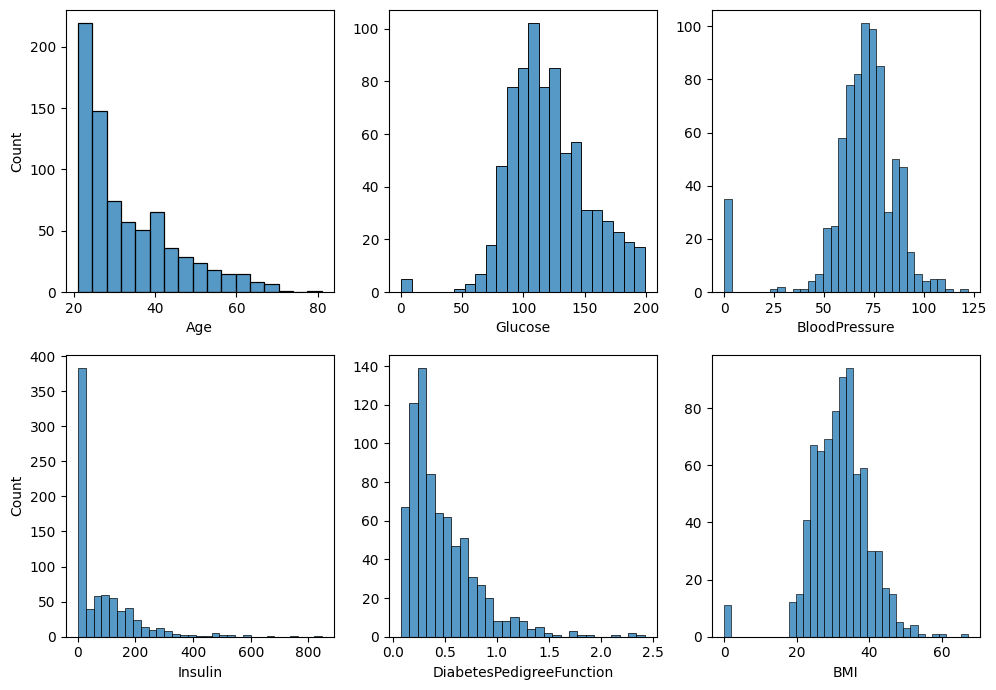

In [8]:
#Visualización de variables numéricas:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "Age")
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "Insulin")
sns.histplot(ax = axis[1, 1], data = df, x = "DiabetesPedigreeFunction").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## **Observaciones**
 - Los valores de glucosa en plasma (después de la prueba de tolerancia) se encuentra en su mayoría en valores normales (inferiores a 140mg/dL). Sólo algunos, con poca frecuencia, se encuentran por encima de ese valor. 
 - En cuanto a los valores de insulina sérica. La mayoría de las personas tienen valores medias correctos (5-25u/mL) pero si existe un buen número de personas que pueden presentar insulino-resistencia (valores mayores a 30U/mL)
 - Referente al 'DiabetesPedigree', con valores inferiores a 1 podrían indicar un bajo riesgo genético de padecer diabetes.
 - En cuanto a la edad, la mayoría de pacientes son menores a 40 años. Hay un gran número comprendido entre los 20-25 años. 

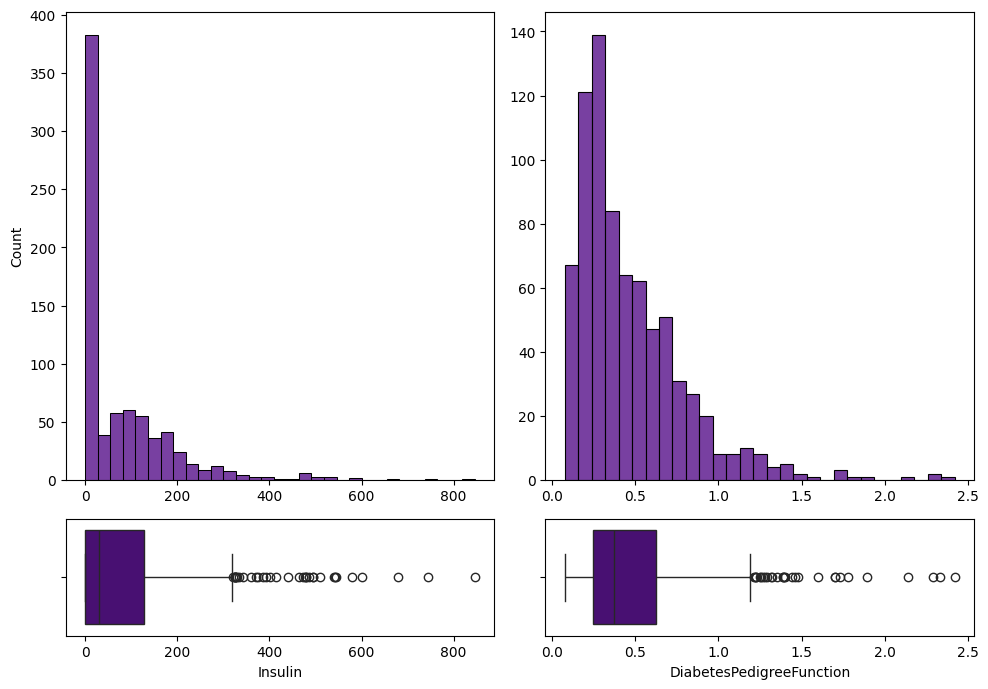

In [9]:
# Revisión de distribución de las variables: 

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 0.5]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "Insulin", color = 'indigo').set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Insulin", color = 'indigo')
sns.histplot(ax = axis[0, 1], data = df, x = "DiabetesPedigreeFunction", color = 'indigo').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "DiabetesPedigreeFunction", color = 'indigo')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## **Observaciones**
Aunque la distribución no es similar ni cercana a la distribución normal. Consideraré la base de datos tal como está sin trasnformaciones porque el modelo sobre el que haré la predicción es árboles de decisiones. No es sensible a escalas y establece reglas de umbrales para la división de espaciones en la data de acuerdo a cada variable predictora. 

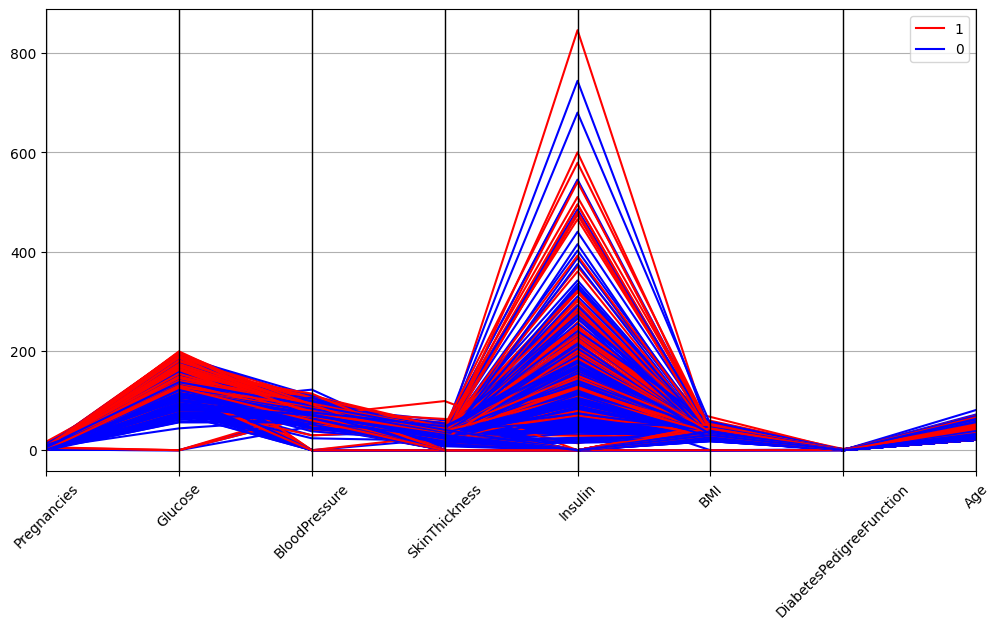

In [10]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## **Observaciones**
Aparentemente, las variables que mejor servirían para discriminar son 'insulina' y 'glucosa'. Cuestión que tiene sentido si hablamos de diabetes, pero si logramos escalar las variables, dada la diversidad de escalas de medición de cada una, podríamos ver algún patrón distinto. 

Tampoco se ve con claridad la diferencia entre ambas condiciones con estos colores. 

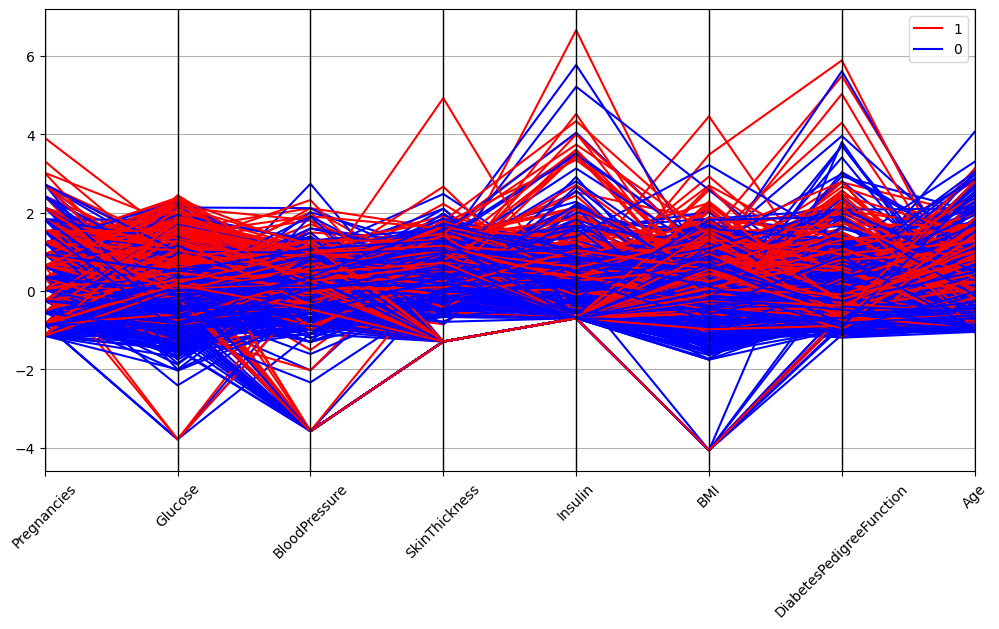

In [11]:
# Visualizamos la relación entre las características de nuestro dataset escalado
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

## **Observaciones**
El proceso de escalado no veo que genera mejor patrón comparativo entre ambas condiciones. Hay muchísimas lineas entre cada condición. Haré el entrenamiento sin escalar a priori. 

## Entrenamiento del Modelo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [13]:
#Árbol de decisión sin parámetros especiales.
total_tree = DecisionTreeClassifier(random_state = 42)
total_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


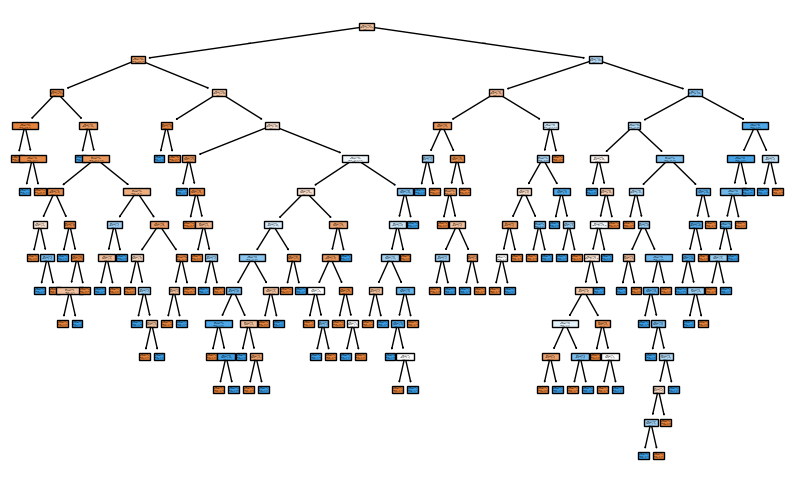

In [14]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(total_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [15]:
#Árbol de decisiones con parámetros establecidos (mínimos estándar)
delim_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
delim_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,30
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,4
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


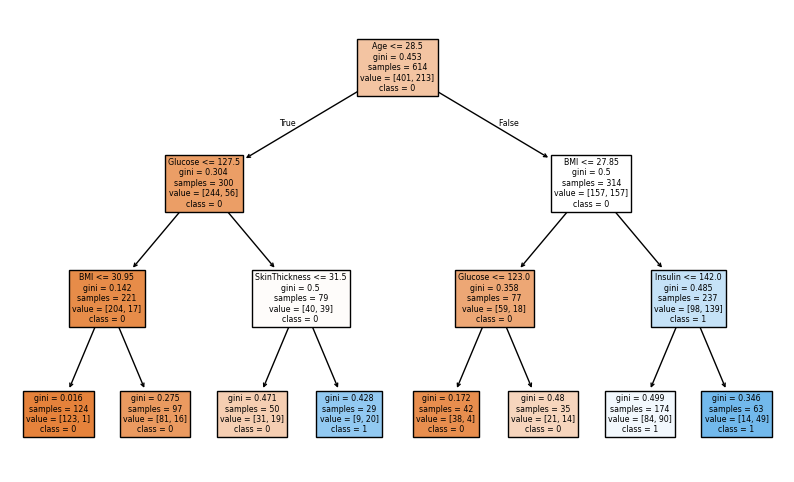

In [16]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(delim_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

### **Observaciones**

Las variables clasificadoras aparente en este árbol son principalmente: los niveles de glucosa (para casos sin diabetes) y el índice de masa corporal seguido de los niveles de insulina para los casos con diabetes. Podría ser una buena aproximación conociendo la enfermedad, pero no considero que el modelo obtenga nodos tan puros. Existen muchas mezclas de casos en la clasificación. 

#### Ajuste de parámetros manual para mejor visualización. 
Empezare por 'min_samples_leaf' con un 5% de mis muestras aprox 35. Con un mínimo de muestras para cortes de 30. 

In [17]:
approach_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35, min_samples_split=30, random_state=42)
approach_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,30
,min_samples_leaf,35
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


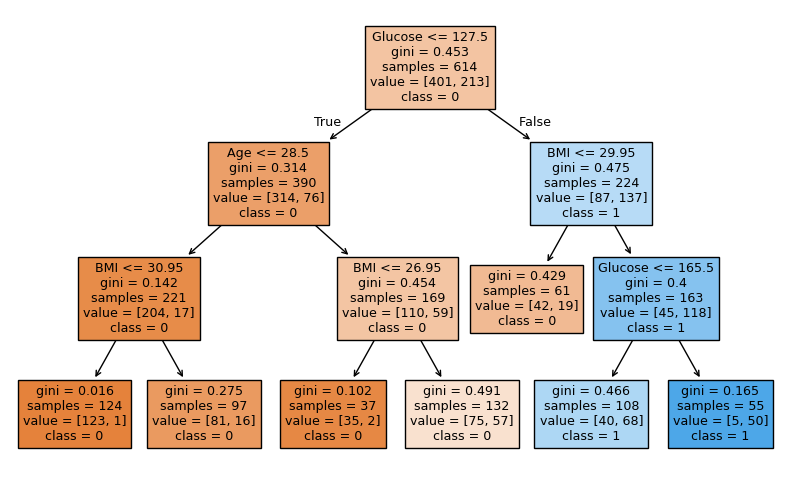

In [18]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(approach_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

## **Observaciones**

En este otro caso, las variables clasificadoras van más por niveles de glucosa como primera instancia separadora, el grupo etario (con un nivel de glucosa inferior a 127,5) para aquellos que pueden no tener la condición y el índice de masa corporal junto con los niveles de glucosa de nuevo. 

Realmente desconozco si un árbol de decisión puede tomar esa misma variable para volver a clasificar sobr un grupo ya clasificado por las mismas razones. Entendería que estableces diferentes umbrales para poder diseccionar, pero no sé qué tanto sentido tenga. 

### Evaluación comparativa de los últimos dos árboles de decisión a partir de sus métricas

In [19]:
# Evaluar el modelo mínimo de parámetros en entrenamiento y prueba
train_pred_delim = delim_tree.predict(X_train)
test_pred_delim = delim_tree.predict(X_test)

# Evaluar el modelo de parámetros ajustados manualmente en entrenamiento y prueba
train_pred_approach = approach_tree.predict(X_train)
test_pred_approach = approach_tree.predict(X_test)

In [20]:
# Métricas del modelo mínimo de parámetros vs ajustados manualmente.
def get_metrics(y_train, y_test, train_preds, test_preds):
    print("Métricas en Train:")
    print(f"Accuracy: {accuracy_score(y_train, train_preds):.4f}")
    print(f"Precision: {precision_score(y_train, train_preds, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_train, train_preds, zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_train, train_preds, zero_division=0):.4f}")
    
    print("\nMétricas en Test:")
    print(f"Accuracy: {accuracy_score(y_test, test_preds):.4f}")
    print(f"Precision: {precision_score(y_test, test_preds, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, test_preds, zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_test, test_preds, zero_division=0):.4f}")

# Usar así:
get_metrics(y_train, y_test, train_pred_delim, test_pred_delim)
get_metrics(y_train, y_test, train_pred_approach, test_pred_approach)

Métricas en Train:
Accuracy: 0.7378
Precision: 0.5977
Recall: 0.7465
F1 Score: 0.6639

Métricas en Test:
Accuracy: 0.6364
Precision: 0.4940
Recall: 0.7455
F1 Score: 0.5942
Métricas en Train:
Accuracy: 0.7720
Precision: 0.7239
Recall: 0.5540
F1 Score: 0.6277

Métricas en Test:
Accuracy: 0.7727
Precision: 0.7273
Recall: 0.5818
F1 Score: 0.6465


## **Observaciones**

En términos generales, el ajuste manual de los parámetros (approach) ha aumentado el nivel de aciertos en las predicciones positivas y negativas, tanto en el de entrenamiento como en el de prueba. Aun asi, considero que para ajustar más el modelo. Podríamos optimizar el modelo a través de la búsqueda de hiperparámetros.

### Optimización con Hiperparámetros

In [21]:
dt = DecisionTreeClassifier(random_state=42)

# Define los valores que quieres probar para max_features
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Define el GridSearch con validación cruzada (cv=5 folds)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenamos y buscamos la mejor combinación de hiperparámetros
grid_search.fit(X_train, y_train)

# Resultados
print("hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5}


### Prueba del Modelo de Árbol de decisión con los mejores parámetros encontrados

In [22]:
def_tree = DecisionTreeClassifier(criterion= 'gini', max_depth=5, max_features=0.8, min_samples_leaf=2, min_samples_split=5, random_state=42)
def_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,0.8
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


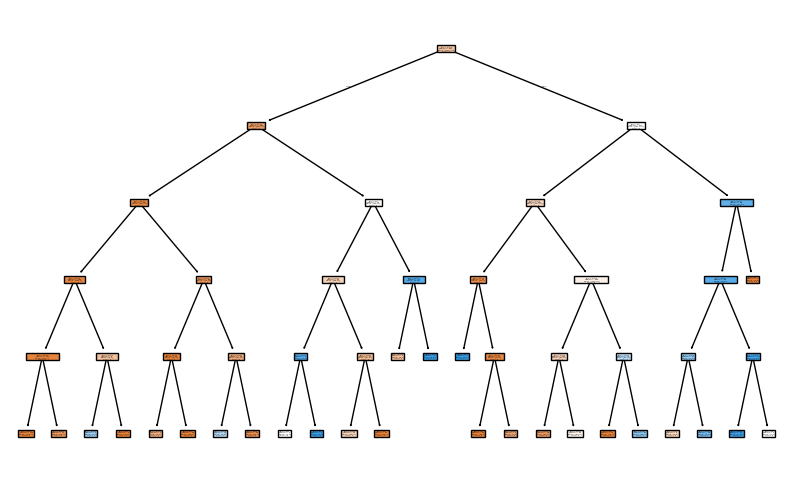

In [23]:
# Visualizamos el árbol de decisión definitivo gráficamente
plt.figure(figsize=(10, 6))
plot_tree(def_tree, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

In [24]:
# Evaluar el modelo defintivo con hiperparámetros en entrenamiento y prueba
train_pred_def = def_tree.predict(X_train)
test_pred_def = def_tree.predict(X_test)

In [25]:
def print_metrics_single_model(y_train, y_test, train_preds, test_preds):
    print("Métricas en Train:")
    print(f"Accuracy: {accuracy_score(y_train, train_preds):.4f}")
    print(f"Precision: {precision_score(y_train, train_preds, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_train, train_preds, zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_train, train_preds, zero_division=0):.4f}")
    print("\nMétricas en Test:")
    print(f"Accuracy: {accuracy_score(y_test, test_preds):.4f}")
    print(f"Precision: {precision_score(y_test, test_preds, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, test_preds, zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_test, test_preds, zero_division=0):.4f}")

print_metrics_single_model(y_train, y_test, train_pred_def, test_pred_def)

Métricas en Train:
Accuracy: 0.8176
Precision: 0.8176
Recall: 0.6103
F1 Score: 0.6989

Métricas en Test:
Accuracy: 0.7338
Precision: 0.6591
Recall: 0.5273
F1 Score: 0.5859


## **Observaciones**

Aparentemente con los hiperparámetros los datos de entrenamiento obtienen un mejor rendimiento general que en el de los parámetros asignados manualmente, pero, en el caso del test, no parecen mejorar demasiado. No estoy muy clara cuál sería la mejor opción para quedarme con el mejor resultado de clasificación. Aún así diseccionaré lo siguiente: 

- Con los hiperparámetros consigo mejor resultado predictivo (mayores aciertos) que con parámetros estándar establecidos manualmente.
- Las métricas en Test no parecen haber mejorado demasiado respecto a los parámetros manuales.
- De acuerdo al último gráfico, la disección es muy amplia y no veo claramente el proceso de selección con nodos muy limpios. 
- El hecho de colocar como mínimo de muestras por hojas = 2, despliega muchas más posibilidades y no sé si mas entropía en el modelo, también es cierto que en el que teníamos parámetros manuales, no obteniamos hojas y nodos tan limpios, pero, de acuerdo a mi criterio, la disección era un poco más clara. 
- Entre todas las variables predictivas, consideraría que las más importantes para la clasificación serían: Insulina, indice de masa corporal, niveles de glucosa y como última vista, la edad. Me sorprende mucho que no haya salido la predisposición genética en este punto. 